# STA4100 Final Project: Heart Attack Prediction in Indonesia

_Zhecheng Ren 任喆程 121090464_

_April 29, 2025_

---

## Table of Contents

1. [Dataset Description](#section-1)
2. [Data Preprocessing](#section-2)
3. [Prediction](#section-3)
4. [Evaluation](#section-4)

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import statsmodels.nonparametric.kernel_regression as kr
import seaborn as sns
sns.set_theme()

---

## 1. Dataset Description <a id="section-1"></a>

**This dataset provides a detailed health profile of individuals in Indonesia, focusing on heart attack prediction**.

Indonesia has seen a rising trend in cardiovascular diseases, making early prediction and prevention crucial. This dataset includes key demographic, clinical, lifestyle, and environmental factors associated with cardiovascular risks. It reflects real-world health trends in Indonesia, considering factors such as hypertension, diabetes, obesity, smoking, and pollution exposure.

 **The main task of this final project is to predict heart attack risks**. In this way does this project support the public health research and epidemiological studies in Indonesia.

### 1.1 Dataset Loading & Variable Description

In this section, we load the dataset and describe the basic information of the varibles in this dataset.

The dataset contains $28$ variables and $158,355$ records. The variables can be divided into $6$ categories:
1. Demographics
2. Clinical Risk Factors
3. Lifestyle & Behavioral
4. Environmental & Social
5. Medical Screening
6. Target Variable
   
The following table summarizes the variable name, data type, description, Chinese name, values/units of each variable:

| Variable Name | Type  | Description                          | Chinese Name      | Values/Units     |
|----------------------------|-------|-------------------------------------------------|------------------------------|--------------------------------------|
|                |             |                            |                  |
| **Demographics**               |             |                                                     |             |                                      |
| age                        | int   | Age of the individual                           | 年龄                         | 25-90 years                          |
| gender                     | str   | Gender                                          | 性别                         | Male, Female                         |
| region                     | str   | Living area                                     | 居住区域                     | Urban, Rural                         |
| income_level               | str   | Socioeconomic status                            | 收入水平               | Low, Middle, High                    |
|                |             |                            |                  |
| **Clinical Risk Factors**   |       |                                                 |              |                                      |
| hypertension               | int   | Presence of high blood pressure                 | 高血压                       | 1=Yes, 0=No                          |
| diabetes                   | int   | Diagnosed diabetes                              | 糖尿病                       | 1=Yes, 0=No                          |
| cholesterol_level          | int   | Total cholesterol level                         | 总胆固醇水平                 | mg/dL                                |
| obesity                    | int   | BMI >30                                         | 肥胖                         | 1=Yes, 0=No                          |
| waist_circumference        | int   | Waist circumference measurement                 | 腰围                         | cm                                   |
| family_history             | int   | Family history of heart disease                 | 心脏病家族史                 | 1=Yes, 0=No                          |
|                |             |                            |                  |
| **Lifestyle & Behavioral** |       |                                                 |        |                                      |
| smoking_status             | str   | Smoking habit                                   | 吸烟状态                     | Never, Past, Current                 |
| alcohol_consumption        | str   | Alcohol intake level                            | 饮酒情况                     | None, Moderate, High                 |
| physical_activity          | str   | Physical activity level                         | 身体活动水平                 | Low, Moderate, High                  |
| dietary_habits             | str   | Diet quality assessment                         | 饮食习惯                     | Healthy, Unhealthy                   |
|                |             |                            |                  |
| **Environmental & Social** |       |                                                 |             |                                      |
| air_pollution_exposure     | str   | Exposure to air pollution                       | 空气污染暴露程度             | Low, Moderate, High                  |
| stress_level               | str   | Perceived stress level                          | 压力水平                     | Low, Moderate, High                  |
| sleep_hours                | float | Average nightly sleep duration                  | 睡眠时长                     | 3-9 hours                            |
|                |             |                            |                  |
| **Medical Screening**       |       |                                                 |     |                                      |
| blood_pressure_systolic    | int   | Systolic blood pressure measurement             | 收缩压                       | mmHg                                 |
| blood_pressure_diastolic   | int   | Diastolic blood pressure measurement            | 舒张压                       | mmHg                                 |
| fasting_blood_sugar        | int   | Fasting blood glucose level                     | 空腹血糖水平                 | mg/dL                                |
| cholesterol_hdl            | int   | High-density lipoprotein (HDL) cholesterol      | 高密度脂蛋白胆固醇           | mg/dL                                |
| cholesterol_ldl            | int   | Low-density lipoprotein (LDL) cholesterol       | 低密度脂蛋白胆固醇           | mg/dL                                |
| triglycerides              | int   | Triglyceride level                              | 甘油三酯水平                 | mg/dL                                |
| EKG_results                | str   | Electrocardiogram results                       | 心电图结果                   | Normal, Abnormal                     |
| previous_heart_disease     | int   | History of heart disease                        | 既往心脏病史                 | 1=Yes, 0=No                          |
| medication_usage           | int   | Use of heart-related medications                | 用药情况                     | 1=Yes, 0=No                          |
| participated_in_free_screening | int | Participation in free health screening program | 参与免费筛查项目             | 1=Yes, 0=No               |
|                |             |                            |                  |
| **Target Variable**         |       |                                                 |                   |                                      |
| heart_attack               | int   | Occurrence of heart attack                      | 心脏病发作                   | 1=Yes, 0=No                          |

In [2]:
# Check the basic information of the dataset
df = pd.read_csv("heart_attack_prediction_indonesia.csv")
# df.info()

### 1.2 Data Visualization & Summary

In this section, we visualize the dataset by ploting the histogram for each variable. For variables with continuous values, we conduct density estimation using the Parzen's kernel estimator:
$$
\hat{f}(x) = \frac{1}{nh} \sum_{i=1}^{n}K(\frac{x - X_i}{h})
$$
where the Normal kernel is picked as the kernel function $K(\cdot)$; the bandwidth $h$ is picked according to the Silverman's rule of thumb.

A summary is attached for each variable, which includes the variable's number of unique and missing values, minimum, median, and maximum.

_Remark:_

_Some variables take categorical values (e.g. `income_level`: Low-Middle-High). These variables are converted into the numerical data type based on the categorical levels (e.g. `income_level`: 0-1-2)._

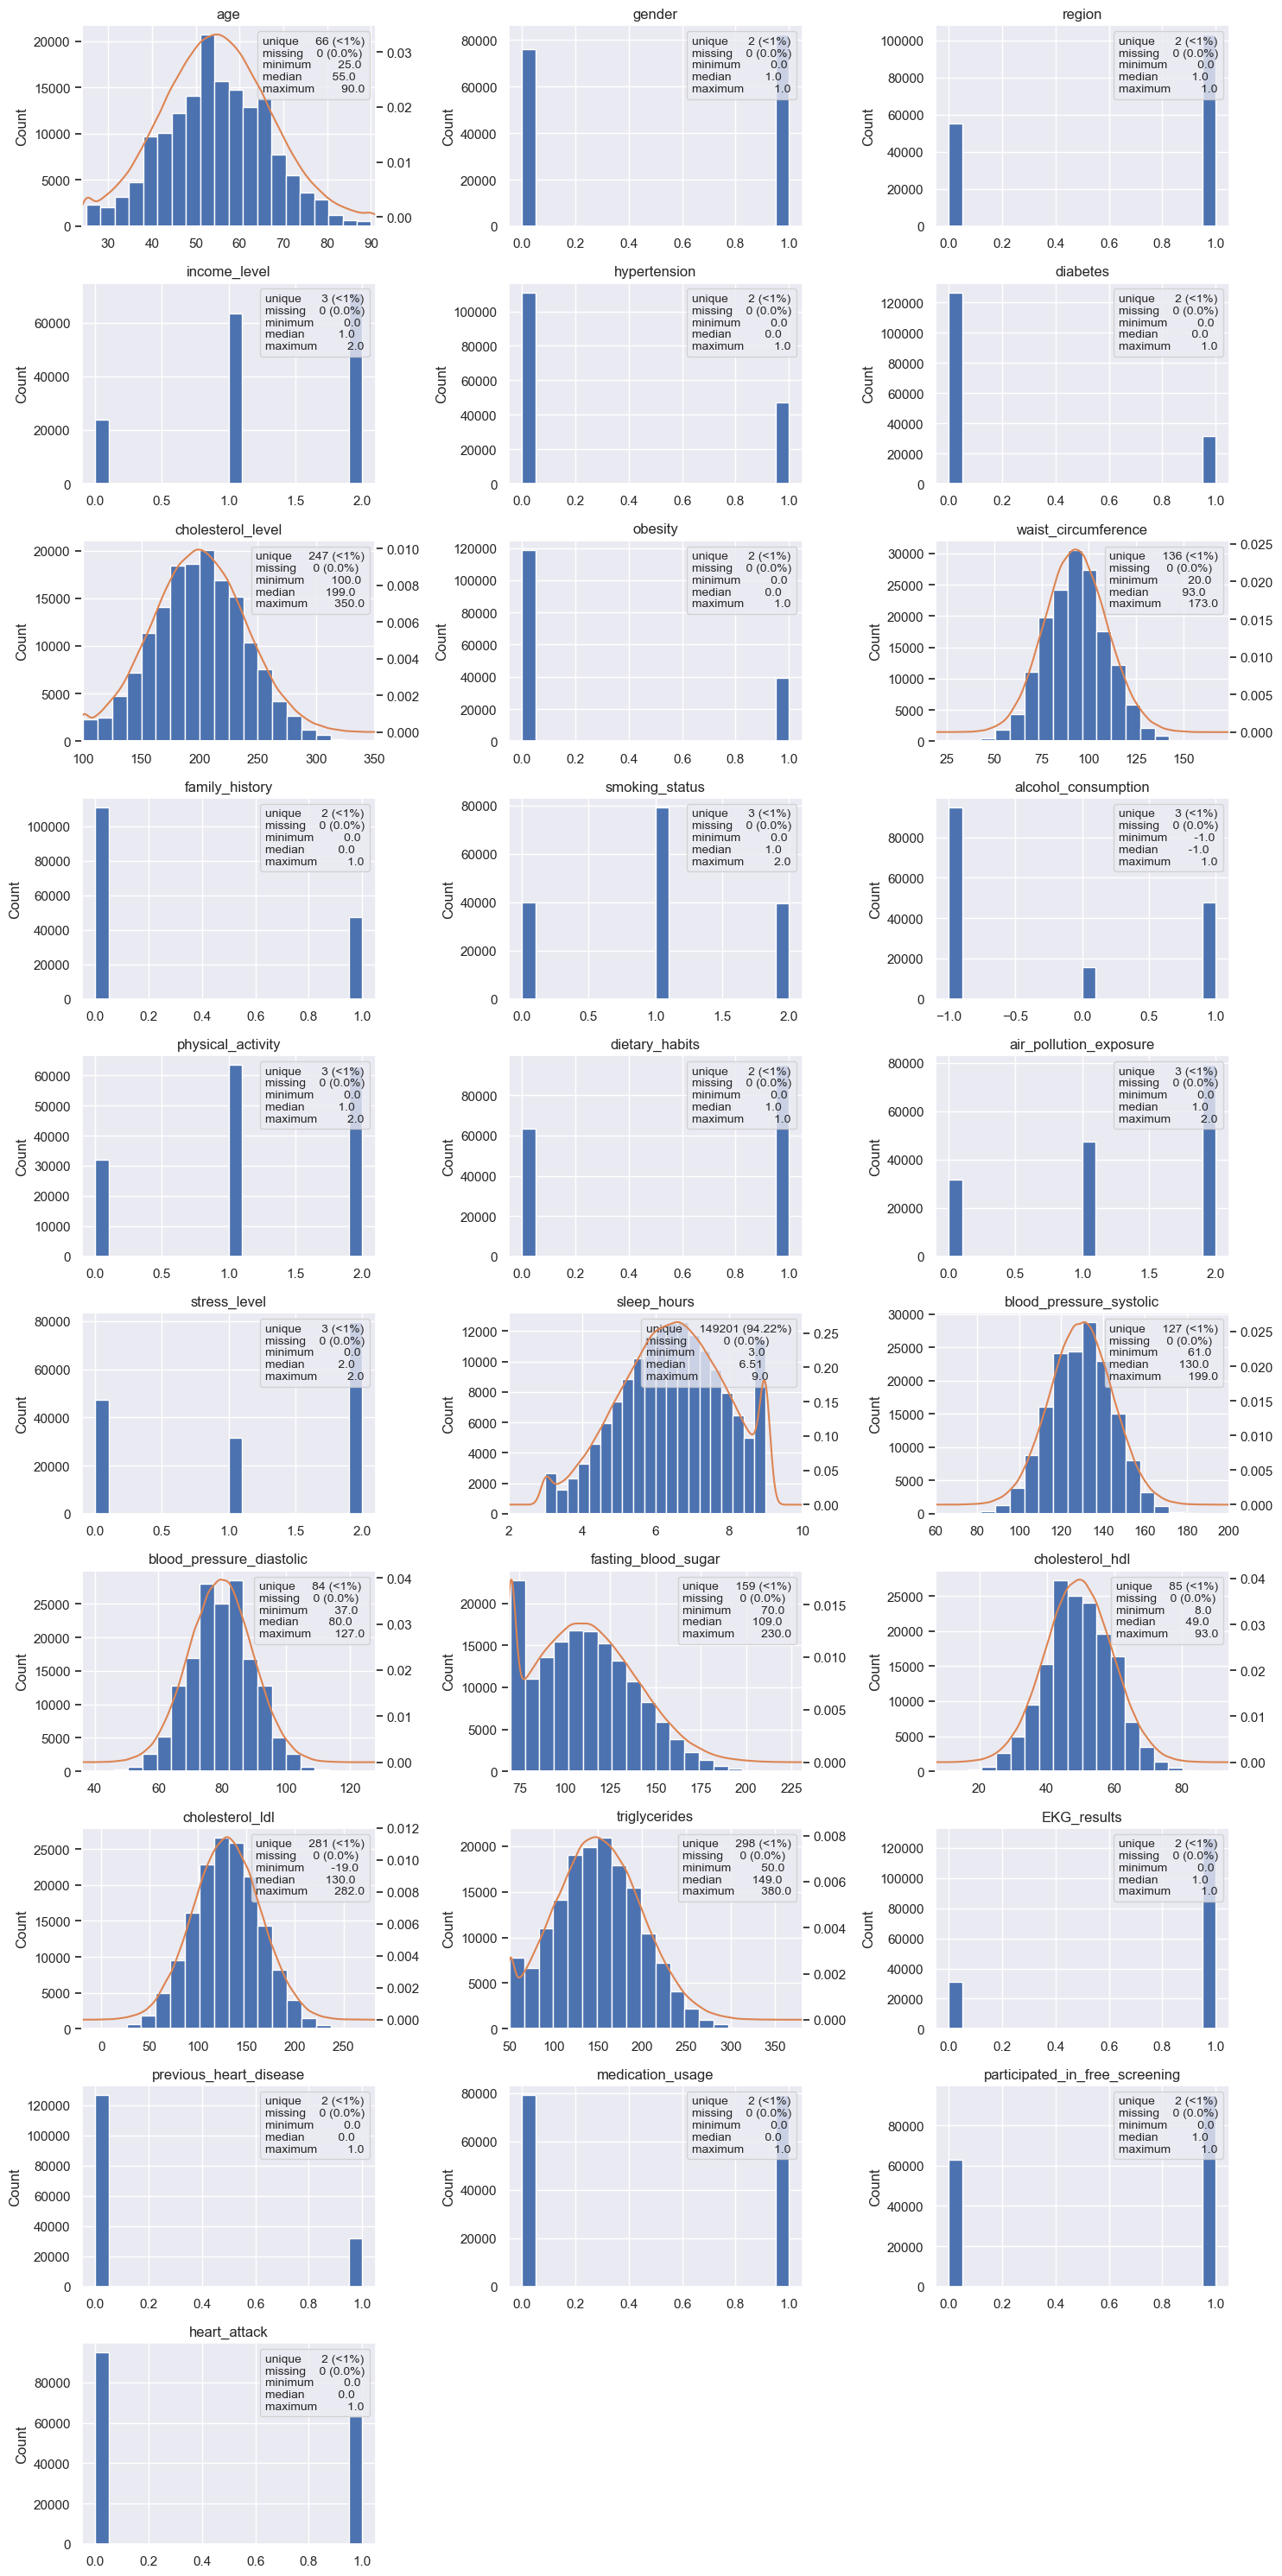

In [3]:
NUMERICAL_VARIABLES = ['age', 'cholesterol_level', 'waist_circumference', 'sleep_hours',
                      'blood_pressure_systolic', 'blood_pressure_diastolic', 'fasting_blood_sugar',
                      'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides']
CATEGORICAL_VARIABLES = df.select_dtypes(include=[object]).columns

# Convert the text columns into categorical
for feature in CATEGORICAL_VARIABLES:
    df[feature] = df[feature].astype('category').cat.codes

# Derive the summary and plot the distribution (with density estimation) for each variable
def data_summary(data):
    n_rows = data.shape[0]
    n_unique = data.nunique()
    n_missing = data.isnull().sum()
    percent_unique = n_unique / n_rows * 100
    percent_missing = n_missing / n_rows * 100
    percent_unique = percent_unique.apply(
        lambda x: "<1%" if x > 0 and x < 1 else str(round(x, 2)) + "%"
    )
    percent_missing = percent_missing.apply(
        lambda x: "<1%" if x > 0 and x < 1 else str(round(x, 2)) + "%"
    )
    unique = n_unique.astype(str) + " (" + percent_unique + ")"
    missing = n_missing.astype(str) + " (" + percent_missing + ")"
    minimum = data.min().round(2)
    median = data.median().round(2)
    maximum = data.max().round(2)
    summary = pd.DataFrame(
        {
            "unique": unique,
            "missing": missing,
            "minimum": minimum,
            "median": median,
            "maximum": maximum,
        }
    )
    return summary

summary = data_summary(df)
fig, axes = plt.subplots(10, 3, figsize=(15, 30))
for i, col in enumerate(df.columns):
    ax = axes[i // 3, i % 3]
    df[col].plot(kind="hist", ax=ax, title=col, bins=20)
    if col in NUMERICAL_VARIABLES:
        ax.set_xlim(df[col].min() - 1, df[col].max() + 1)
        df[col].plot.kde(bw_method='silverman', ax=ax, secondary_y=True, grid=False)
        ax.tick_params(axis="y", labelright=False)
    ax.set_ylabel("Count")
    ax.legend(
        [summary.loc[col].to_string()],
        loc="upper right",
        fontsize=10,
        handlelength=0,
        handletextpad=0,
    )
fig.delaxes(axes[9, 1])
fig.delaxes(axes[9, 2])
plt.tight_layout()
plt.show()

---
## 2. Data Preprocessing <a id="section-2"></a>

In this project, the dataset first undergoes the preprocssing procedure, **which includes feature selection, train-test split, and data scaling**.


### 2.1 Feature Selection (By Checking for Correlation via Density Estimation and Visualization)

The original features include $27$ different variables, some of which may be irrelavent to our target variable `heart_attack`.

We first investigate the relationship between each feature variable and `heart_attack` through visualization. The whole dataset is splitted into two according to the value of `heart_attack`. The histogram plot and density estimation (with Normal kernel and rule-of-thumb bandwidth) are conducted for each feature variable in both datasets.

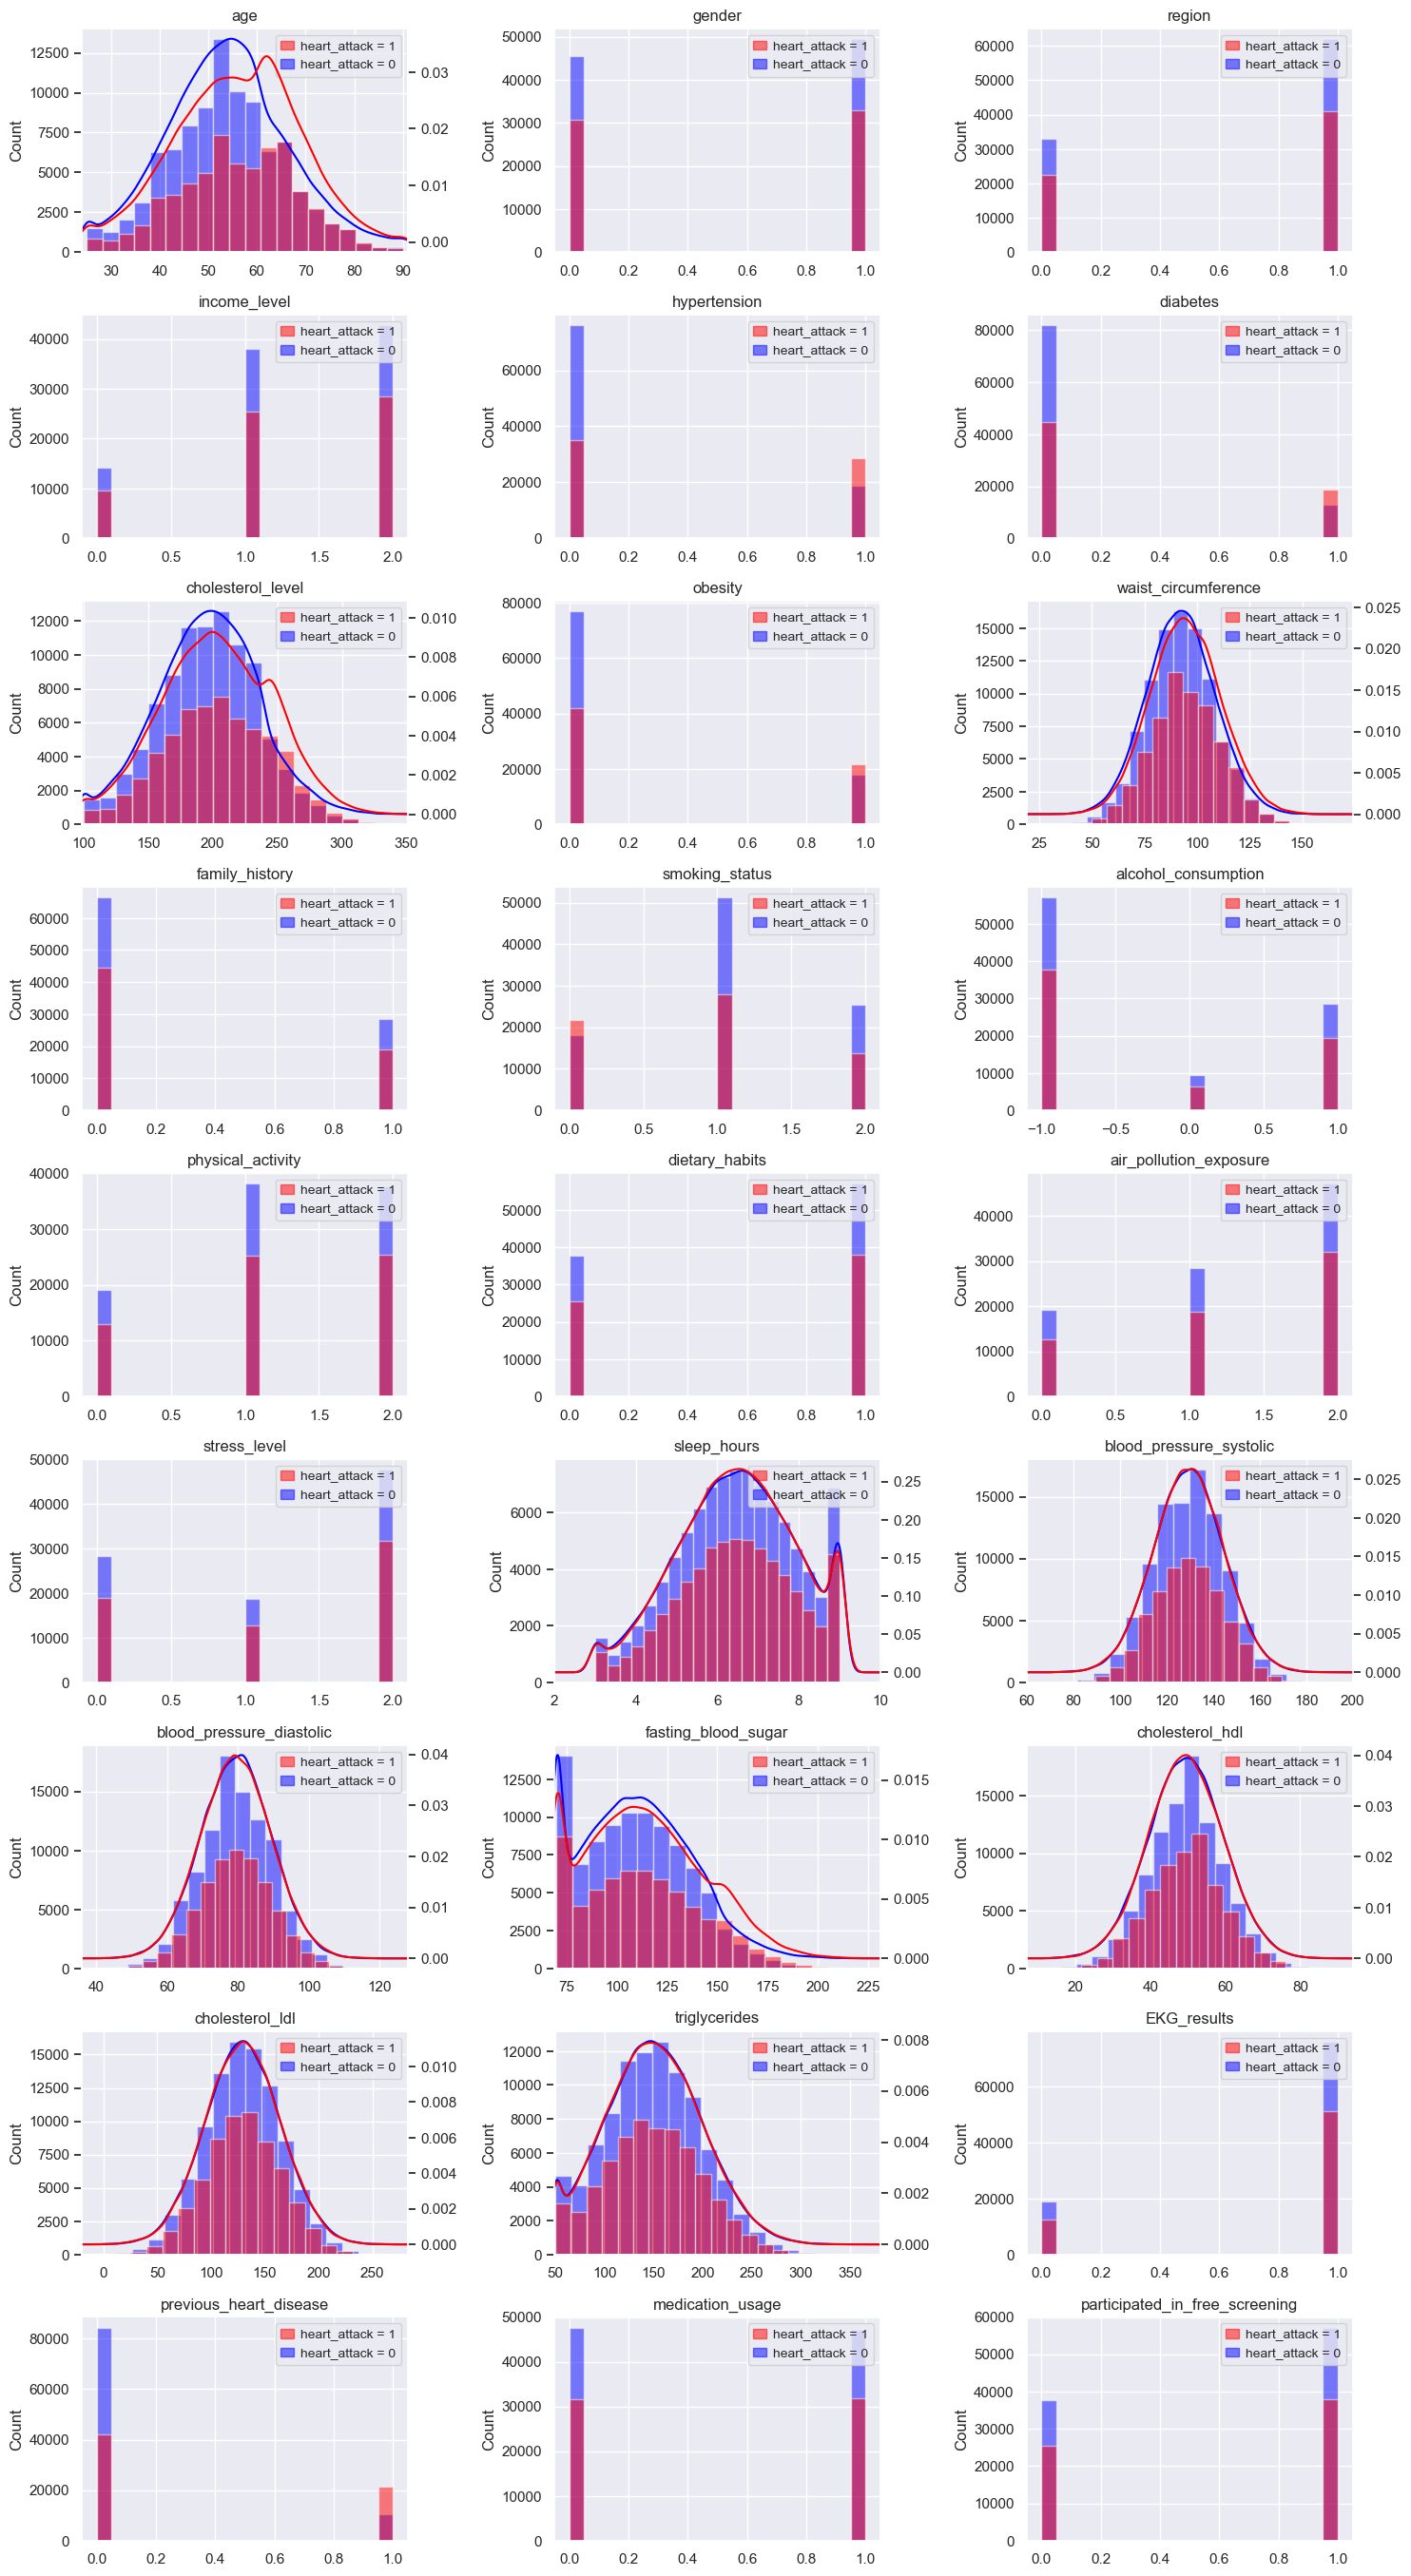

In [4]:
# Split the dataset according to the target variable
df_0 = df[df["heart_attack"] == 0]
df_1 = df[df["heart_attack"] == 1]

# Histogram plot the density estimation for each feature variable
fig, axes = plt.subplots(10, 3, figsize=(15, 30))
blue_patch = mpatches.Patch(color='blue', label='heart_attack = 0', alpha=0.5)
red_patch = mpatches.Patch(color='red', label='heart_attack = 1', alpha=0.5)
for i, col in enumerate(df.columns):
    ax = axes[i // 3, i % 3]
    df_0[col].plot(kind="hist", ax=ax, title=col, bins=20, alpha=0.5, color="blue")
    df_1[col].plot(kind="hist", ax=ax, title=col, bins=20, alpha=0.5, color="red")
    if col in NUMERICAL_VARIABLES:
        ax.set_xlim(df[col].min() - 1, df[col].max() + 1)
        df_0[col].plot.kde(bw_method='silverman', ax=ax, secondary_y=True, grid=False, color="blue")
        df_1[col].plot.kde(bw_method='silverman', ax=ax, secondary_y=True, grid=False, color="red")
        ax.tick_params(axis="y", labelright=False)
    ax.set_ylabel("Count")
    ax.legend(
        handles=[red_patch, blue_patch],
        loc="upper right",
        fontsize=10,
        handlelength=1,
        handletextpad=0.5,
    )
fig.delaxes(axes[9, 0])
fig.delaxes(axes[9, 1])
fig.delaxes(axes[9, 2])
plt.tight_layout()
plt.show()

One key observation is that, for feature variables like `gender`, `blood_pressure_diastolic`, `sleep level`, their distributions bear almost no difference under different values of `heart_attack`. This observation indicates that, these variables may make little contribution to the prediction of heart attack.

_Remark:_

_This observation may sounds counter-intuitive at first glance. For example, some medical research has revealed the strong relationship between heart attack and abnormal blood pressure. How can`blood_pressure_diastolic` be irrelavent with `heart_attack`?_

_My speculation is that for diastolic blood pressure, it will be considered abnormal when its value larger than $100$. Such data may indeed imply the risk of heart attack, but they are also very rare in the whole population. Therefore, in a general sense, `blood_pressure_diastolic` looks like irrelavent with `heart_attack`_.

_Also, a notable observation is that `hypertension` is related to `heart_attack`_.

### 2.2 Feature Selection (By Checking for Correlation via Hypothesis Testing)

Simply doing visualization does not provide us a concrete threshold for feature selection. We conduct feature selection through the following procedures:

1. Compute the (absolute) Pearson's correlation between each feature and `heart_attack`.
2. For each feature, conduct a Spearsman's $\rho$ correlation coefficient test with the following hypothesis. Since it's a multiple hypothesis testing, we control the FDR through Benjamini-Hochberg procedure.
$$
H_{0i}: \text{feature i is independent with heart attack} ~~~ v.s. ~~~ H_{1i}: otherwise
$$
3. For each feature, conduct a two-sample Kolmogorove-Smirnov test with the following hypothesis. Since it's a multiple hypothesis testing, we control the FDR through the Benjamini-Hochberg procedure.
$$
H_{0i}: \text{the distribution of feature i bears no difference under heart attack = 0 or heart attack = 1} ~~~ v.s. ~~~ H_{1i}: otherwise
$$

We select a feature as long as any one of the two tests shows statistical significance.

_Remark:_

_Why do I control the FDR instead of FWER?_

_Since it's in the preprocessing procedure, compared to missing potentially useful features, including potentially useless features is more affordable. Therefore, we prefer a less conservative procedure to control the multiple hypothesis testing._

_It also explains why I select a feature even when only one of the tests shows significance._

In [5]:
TARGET = "heart_attack"
FEATURE = df.columns.drop(TARGET)

def feature_selection(df, target, alpha=0.05):
    result_df = df.corr()[target].drop(target)
    result_df = pd.DataFrame(result_df)
    result_df.columns = ["Correlation"]
    result_df["Abs_correlation"] = abs(result_df["Correlation"])

    Spearman_rou_p_values = []
    KS_p_values = []
    df_0 = df[df[target] == 0]
    df_1 = df[df[target] == 1]
    for feature in df.columns.drop(target):
        KS_p_values.append(stats.ks_2samp(df_0[feature], df_1[feature])[1])
        Spearman_rou_p_values.append(stats.spearmanr(df[feature], df[target])[1])

    KS_p_values_adjusted = sm.stats.multipletests(KS_p_values, alpha=alpha, method="fdr_bh")[1]
    result_df["KS_p_adj"] = KS_p_values_adjusted

    Spearman_rou_p_values_adjusted = sm.stats.multipletests(Spearman_rou_p_values, alpha=alpha, method="fdr_bh")[1]
    result_df["Spearman_rou_p_adj"] = Spearman_rou_p_values_adjusted

    result_df["Selected"] = (
        (result_df["KS_p_adj"] < alpha) |
        (result_df["Spearman_rou_p_adj"] < alpha)
    )
    return result_df

result_df = feature_selection(df, TARGET)
result_df = result_df.sort_values(by="Abs_correlation", ascending=False)
selected_features = result_df[result_df["Selected"]].index
X_selected = df[selected_features].copy()
result_df

,Correlation,Abs_correlation,KS_p_adj,Spearman_rou_p_adj,Selected
previous_heart_disease,0.274775,0.274775,0.000000e+00,0.000000e+00,True
hypertension,0.269261,0.269261,0.000000e+00,0.000000e+00,True
diabetes,0.194512,0.194512,0.000000e+00,0.000000e+00,True
obesity,0.171720,0.171720,0.000000e+00,0.000000e+00,True
smoking_status,-0.139962,0.139962,0.000000e+00,0.000000e+00,True
age,0.105756,0.105756,0.000000e+00,0.000000e+00,True
cholesterol_level,0.092611,0.092611,0.000000e+00,3.384134e-263,True
fasting_blood_sugar,0.069826,0.069826,1.390236e-135,1.610945e-115,True
waist_circumference,0.067883,0.067883,1.034631e-114,6.174598e-150,True
alcohol_consumption,0.005742,0.005742,1.787037e-01,4.227025e-02,True


The above table is ordered according to the absolute value of Pearson's correlation.

After this procedure, the following $10$ features are selected to conduct subsequent analysis: `previous_heart_attack`, `hypertension`, `diabetes`, `obesity`, `smoking_status`, `age`, `cholesterol_level`, `fasting_blood_suger`, `waist_circumference`, `alcohol_consumption`.

### 2.3 Feature Selection (By Checking for Multicollinearity)

Notice that for the selected $10$ features, some of them may have strong correlation with each other (e.g. `waist_circumference` and `obesity`, `fasting_blood_sugar` and `diabetes`). To enhance the explanatory power of our analysis, we consider checking for the multicollinearity.

We compute the variance inflation factor (VIF) for each feature, and consider filtering out features with VIF $> 10$.

After filtering out `waist_circumference`, `cholesterol_level`, and `fasting_blood_sugar`, the VIF for each feature becomes less than $4$, which is acceptable.

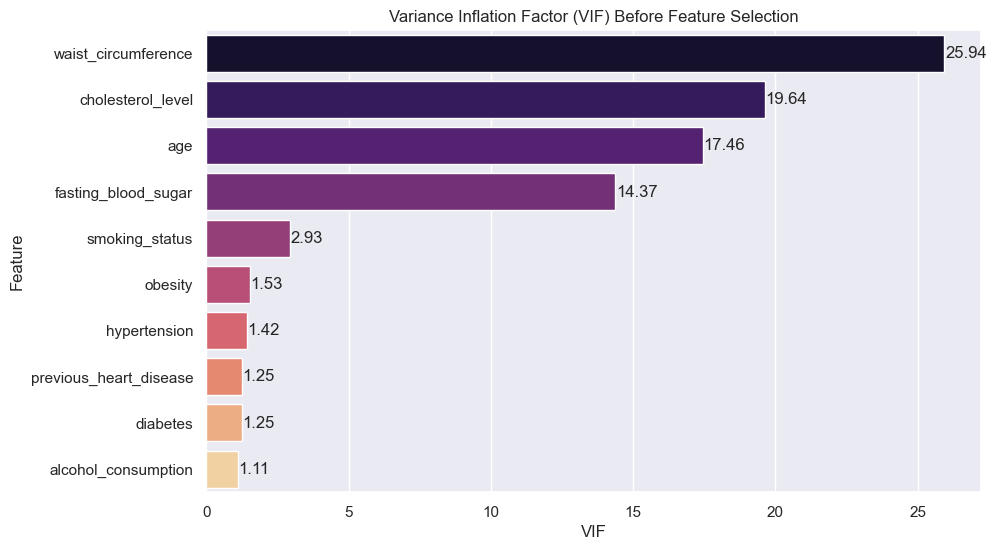

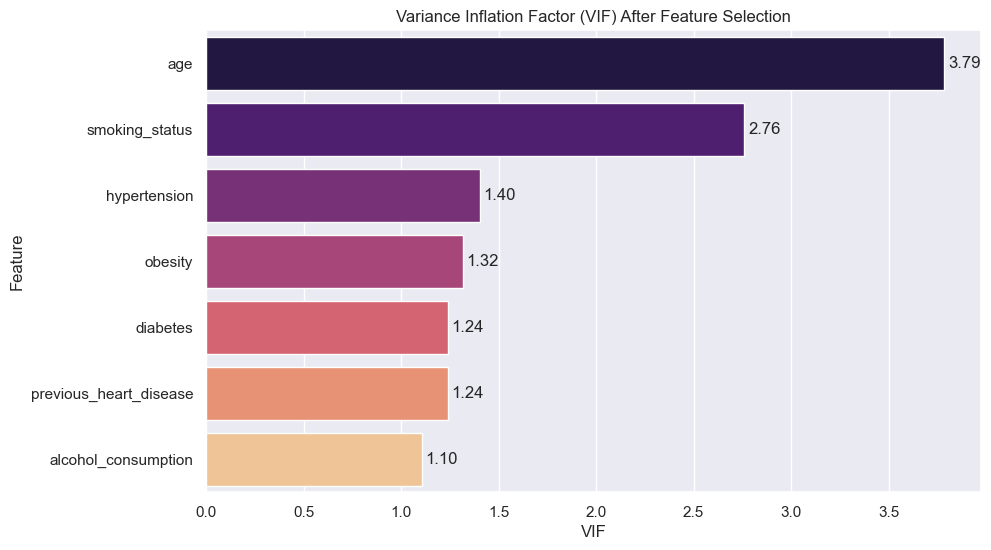

In [6]:
# Check for multicollinearity
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["Feature"] = X.columns
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif

vif = calculate_vif(X_selected)
plt.figure(figsize=(10, 6))
sns.barplot(x="VIF", y="Feature", data=vif, palette="magma")
for index, value in enumerate(vif["VIF"]):
    plt.text(value+0.02, index, f"{value:.2f}", va="center", fontsize=12)
plt.title("Variance Inflation Factor (VIF) Before Feature Selection")
plt.show()

selected_features = ['previous_heart_disease', 'hypertension', 'diabetes', 'obesity', 'smoking_status', 'age', 'alcohol_consumption']
X_selected = X_selected[selected_features]
vif_selected = calculate_vif(X_selected)
plt.figure(figsize=(10, 6))
sns.barplot(x="VIF", y="Feature", data=vif_selected, palette="magma")
for index, value in enumerate(vif_selected["VIF"]):
    plt.text(value+0.02, index, f"{value:.2f}", va="center", fontsize=12)
plt.title("Variance Inflation Factor (VIF) After Feature Selection")
plt.show()

### 2.4 Train-Test Split & Data Scaling

To evaluate the effectiveness of our prediction, we split the whole dataset into a training set (which accounts for $80%$ of the data) and a testing set (which accounts for $20%$ of the data).

A Z-score normalization is also performed for each feature.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, df[TARGET], test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---
## 3. Prediction <a id="section-3"></a>

We consider using **nonparametric regression** to predict heart attack.

### 3.1 Nonparametric Regression with Different Kernels

Under the nonparametric regression setting, the model is given by
$$
Y_i = m(X_{1i}, X_{2i}, \dots, X_{7i}) + \epsilon_i, \quad i = 1, \dots, n
$$
where $\{ \epsilon_i \}_{1 \leq i \leq n}$ are i.i.d. random errors with mean $0$ and variance $\sigma^2$.

Consider using the **Product Kernel**
$$
K(u_1, u_2, \dots, u_7) = K_1(u_1) K_2(u_2) \dots K_7(u_7).
$$

Given independent samples $\{ (X_{1i}, X_{2i}, \dots, X_{7i}, Y_i) \}_{1 \leq i \leq n}$, the Nadaraya-Watson kernel estimator of $m(x)$ is given by
$$
\hat{m}(x_1, x_2, \dots, x_7) = \frac{\sum_{i=1}^n Y_i K(\frac{x_1 - X_{1i}}{h_1}, \dots, \frac{x_7 - X_{7i}}{h_7})}{\sum_{i=1}^n K(\frac{x_1 - X_{1i}}{h_1}, \dots, \frac{x_7 - X_{7i}}{h_7})}
$$
where $K(\cdot)$ is the product kernel and $h$ is the bandwidth. For simplicity, we consider all $K_1, \dots, K_7$ to be the same kernel function, and all $h_1, \dots, h_7$ to be the same bandwidth.

The kernel function is chosen from:

+ Normal kernel: $K(u) = \frac{1}{\sqrt{2\pi}} e^{-\frac{u^2}{2}}$
+ Double exponential kernel: $K(u) = \frac{1}{2} e^{-|u|}$
+ Triangle kernel: $K(u) = (1 - |u|) \boldsymbol{1}_{\{|u| \leq 1\}}$
+ Uniform kernel: $K(u) = \boldsymbol{1}_{\{|u| \leq 0.5\}}$
+ Triweight kernel: $K(u) = (1 - u^2)^3 \boldsymbol{1}_{\{|u| \leq 1\}}$

$\hat{m}(x_1, x_2, \dots, x_7)$ can be understood as a heart attack score (not necessarily meaning probability). And we predict `heart_attack` $= 1$ if $\hat{m}(x_1, x_2, \dots, x_7) > 0.5$, `heart_attack` $=0$ otherwise.

_Remark: Here we do not bother too much about the bandwidth here._

In [8]:
def nonpara_reg(X, y, X_new, kernel='normal', bandwidth=0.1):
    y_pred_lst = []
    for x in X_new:
        if kernel == 'normal':
            weights = np.exp(-np.sum((X - x) ** 2, axis=1) / (2 * bandwidth ** 2))
        elif kernel == 'double exponential':
            weights = np.exp(-np.sum(np.abs(X - x), axis=1) / (2 * bandwidth))
        elif kernel == 'triangular':
            u = np.abs(X - x) / bandwidth
            weights = (1 - u) * (u <= 1)
            weights = np.prod(weights, axis=1)
        elif kernel == 'uniform':
            weights = (np.abs(X - x) <= bandwidth) / (2 * bandwidth)
            weights = np.prod(weights, axis=1)
        elif kernel == 'triweight':
            u = np.abs(X - x) / bandwidth
            weights = (1 - u ** 2) ** 3 * (u <= 1)
            weights = np.prod(weights, axis=1)
        else:
            raise ValueError("Unsupported kernel type")
        y_pred_lst.append(np.sum(weights * y) / max(np.sum(weights), 1e-10))
    return np.array(y_pred_lst)

KERNELS = ['normal', 'double exponential', 'triangular', 'uniform', 'triweight']
BANDWIDTHS = [0.5, 0.25, 0.5, 0.5, 0.5]
accuracy_lst = {}
for i in range(len(KERNELS)):
    kernel = KERNELS[i]
    bandwidth = BANDWIDTHS[i]
    y_pred_lst = nonpara_reg(X_train, y_train, X_test, kernel=kernel, bandwidth=bandwidth)
    y_pred_lst = np.where(y_pred_lst > 0.5, 1, 0)
    accuracy_bagging = accuracy_score(y_test, y_pred_lst)
    dict_name = f"NPR ({kernel})"
    accuracy_lst[dict_name] = accuracy_bagging
    print(f"Accuracy of non-parametric regression with {kernel} kernel: {accuracy_bagging:.4f}")

Accuracy of non-parametric regression with normal kernel: 0.7229
Accuracy of non-parametric regression with double exponential kernel: 0.7230
Accuracy of non-parametric regression with triangular kernel: 0.7222
Accuracy of non-parametric regression with uniform kernel: 0.7221
Accuracy of non-parametric regression with triweight kernel: 0.7234


### 3.2 Nonparametric Regression with Cross Validation

To pick the best bandwith, we consider using the cross validation.

In [ ]:
kr_model = kr.KernelReg(endog=y_train, exog=X_train, var_type='o'*X_train.shape[1])
results = kr_model.fit(X_test)
y_pred_lst = results[0]
y_pred_lst = np.where(y_pred_lst > 0.5, 1, 0)
accuracy_bagging = accuracy_score(y_test, y_pred_lst)
print(f"Accuracy of non-parametric regression with cross validation: {accuracy_bagging:.4f}")

_Remark: Unfortunately, the code has been running for over ten hours and the result has not shown up till now._

### 3.3 Bagging (Bootstrap Aggregation)

Different from Bootstrap, bagging is a method in ensemble learning. By aggregating several weak predictors (that may be easy to overfit and influenced by outliers), bagging can reduce the variance of the prediction.

But in principle, bagging relies on bootstrap (resampling). Here we resample the training set $10$ times (without replacement) and train $10$ different nonparametric regression predictor. We obtain the final prediction by taking the mean of the results of $10$ predictors.

In [11]:
def bagging(X, y, X_new, kernel='normal', bandwidth=0.1, n_estimators=10):
    y_pred_lst = []
    for _ in range(n_estimators):
        bootstrap_indices = np.random.choice(range(X.shape[0]), size=X.shape[0], replace=True)
        X_bootstrap = X[bootstrap_indices]
        y_bootstrap = y.iloc[bootstrap_indices]
        y_pred = nonpara_reg(X_bootstrap, y_bootstrap, X_new, kernel=kernel, bandwidth=bandwidth)
        y_pred_lst.append(y_pred)
    y_pred_lst = np.array(y_pred_lst)
    return np.mean(y_pred_lst, axis=0)

y_pred_lst = bagging(X_train, y_train, X_test, kernel='normal', bandwidth=0.5, n_estimators=10)
y_pred_lst = np.where(y_pred_lst > 0.5, 1, 0)
accuracy_bagging = accuracy_score(y_test, y_pred_lst)
print(f"Accuracy of non-parametric regression with normal kernel and bagging: {accuracy_bagging:.4f}")

Accuracy of non-parametric regression with normal kernel and bagging: 0.7228


### 3.4 Bootstrap Confidence Interval for Heart Attack Score

We consider construct a bootstrap confidence interval for our heart attack score prediction $\hat{m}(x_1, x_2, \dots, x_7)$ (using normal kernel and bandwidth $0.5$).

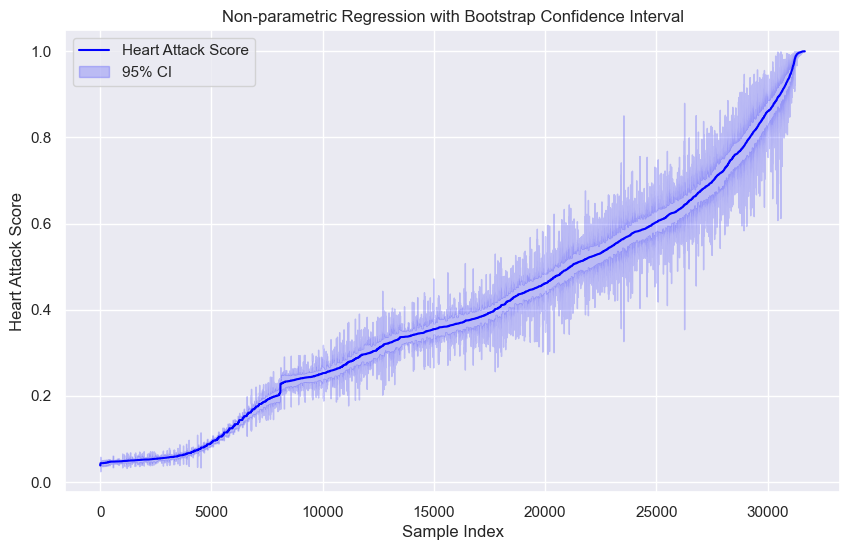

In [15]:
def bootstrap_ci(X, y, X_new, kernel='normal', bandwidth=0.1, n_estimators=100, alpha=0.05):
    y_pred_lst = []
    for _ in range(n_estimators):
        bootstrap_indices = np.random.choice(range(X.shape[0]), size=X.shape[0], replace=True)
        X_bootstrap = X[bootstrap_indices]
        y_bootstrap = y.iloc[bootstrap_indices]
        y_pred = nonpara_reg(X_bootstrap, y_bootstrap, X_new, kernel=kernel, bandwidth=bandwidth)
        y_pred_lst.append(y_pred)
    y_pred_lst = np.array(y_pred_lst)
    y_pred_bagging = np.mean(y_pred_lst, axis=0)
    lower_bound = np.percentile(y_pred_lst, 100 * (alpha / 2), axis=0)
    upper_bound = np.percentile(y_pred_lst, 100 * (1 - alpha / 2), axis=0)
    return y_pred_bagging, lower_bound, upper_bound

y_pred_bagging, lower_bound, upper_bound = bootstrap_ci(X_train, y_train, X_test, kernel='normal', 
                                                        bandwidth=0.5, n_estimators=50, alpha=0.05)
idx = np.argsort(y_pred_bagging)
y_pred_bagging = y_pred_bagging[idx]
lower_bound = lower_bound[idx]
upper_bound = upper_bound[idx]
plt.figure(figsize=(10, 6))
plt.plot(y_pred_bagging, label='Heart Attack Score', color='blue')
plt.fill_between(range(len(y_pred_bagging)), lower_bound, upper_bound, color='blue', alpha=0.2, label='95% CI')
plt.title('Non-parametric Regression with Bootstrap Confidence Interval')
plt.xlabel('Sample Index')
plt.ylabel('Heart Attack Score')
plt.legend()
plt.show()

## 4. Evaluation <a id="section-4"></a>

To evaluate the performance of our prediction algorithms, we also consider implementing several benchmark methods. Here we implemente logistic regression, decision tree, random forest, and SVM (with RBF kernel) and derive their accuracies.

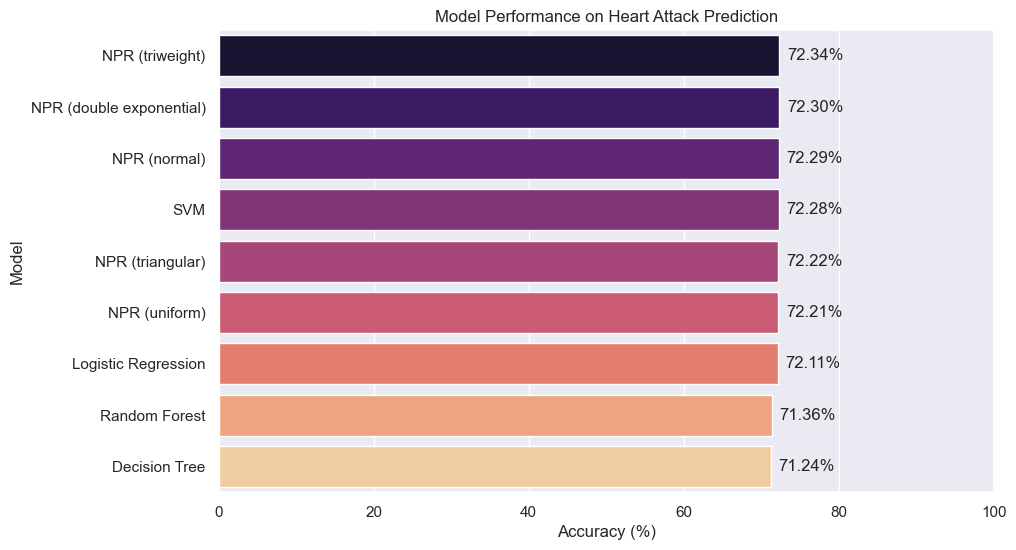

In [16]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}
accuracy_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_lst_normal = model.predict(X_test)
    accuracy_normal = accuracy_score(y_test, y_pred_lst_normal)
    accuracy_results[name] = accuracy_normal
accuracy_df = pd.DataFrame(accuracy_results.items(), columns=["Model", "Accuracy"])
accuracy_df = pd.concat([accuracy_df, pd.DataFrame(accuracy_lst.items(), columns=["Model", "Accuracy"])], ignore_index=True)
accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False)
accuracy_df["Accuracy"] = accuracy_df["Accuracy"] * 100

# Visualization - Bar Chart with Percentage
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=accuracy_df, palette="magma")

# Show percentage labels on bars
for index, value in enumerate(accuracy_df["Accuracy"]):
    plt.text(value + 1, index, f"{value:.2f}%", va="center", fontsize=12)

plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.title("Model Performance on Heart Attack Prediction")
plt.xlim(0, 100)  # Set limits from 0 to 100
plt.show()

After comparing with these benchmark methods, we can see that non-parametric regression has a slightly better performance.